In [6]:
%store -r loans

In [7]:
import matplotlib.pyplot as plt

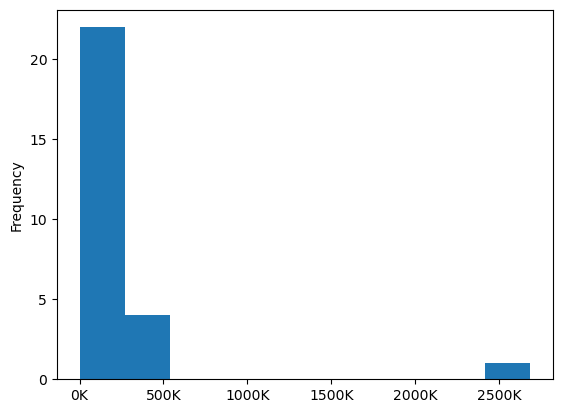

In [8]:
#loans.total_gbv.plot.hist() is the simpler graph to make

loans.total_gbv.plot.hist(bins=10)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))
plt.show()

<Axes: >

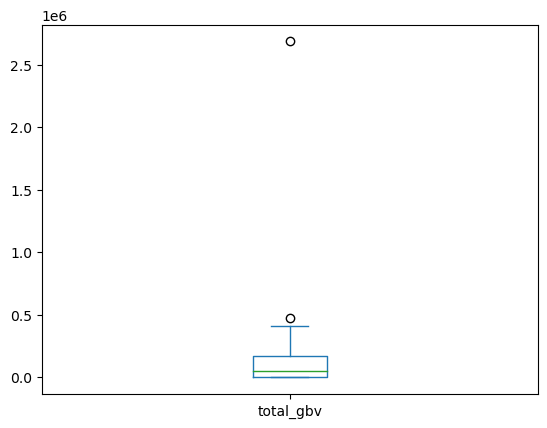

In [9]:
loans.total_gbv.plot.box()

<Axes: ylabel='Density'>

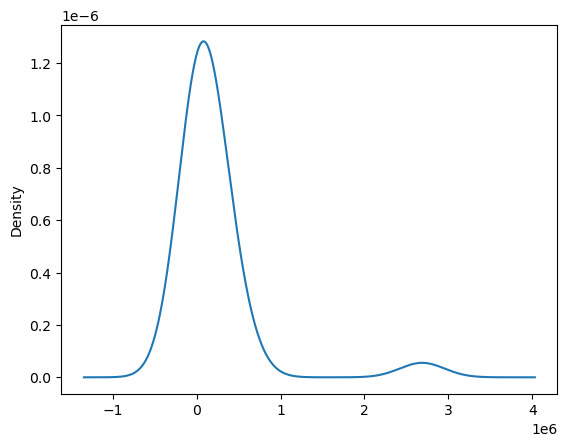

In [10]:
loans.total_gbv.plot.kde()

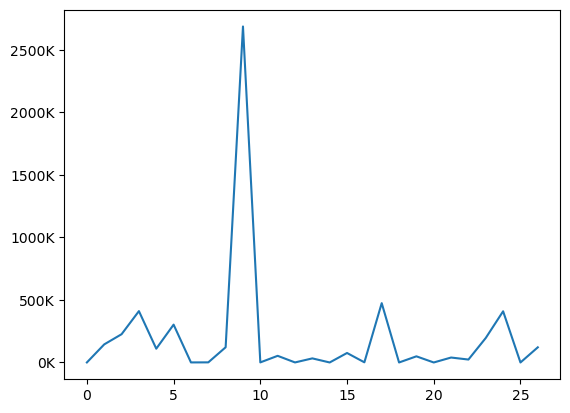

In [11]:
loans.total_gbv.plot.line()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))
plt.show()

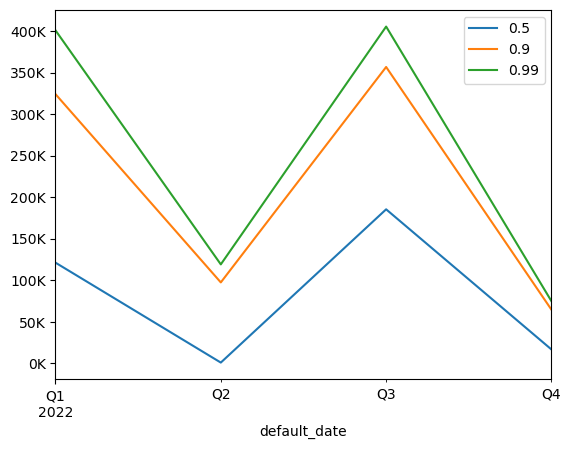

In [12]:
# Filter the DataFrame to include only data for the year 2022 - bc I only have one entry from 2013 that ruins the graph
loans_2022 = loans.loc[loans['default_date'].dt.year == 2022]

# Resample 'total_gbv' by quarter and calculate quantiles for the year 2022
total_gbv_resampled_2022 = loans_2022.resample('Q', on='default_date')['total_gbv'].quantile([0.5, 0.9, 0.99])

# Plotting the line chart for 2022 data
total_gbv_resampled_2022.unstack().plot.line()

# Formatting the y-axis to display in Ks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))
plt.show()

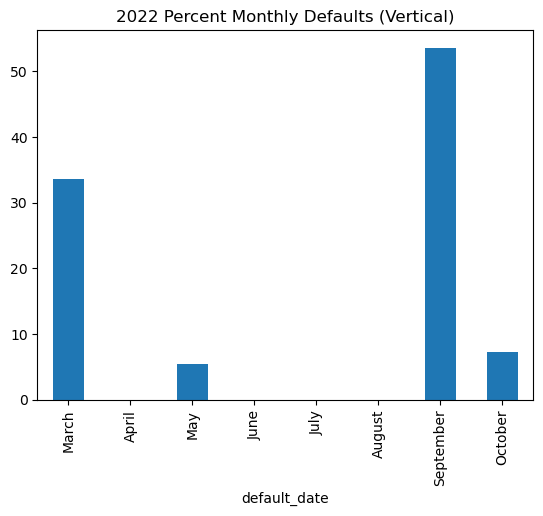

In [16]:
# Calculate the sum of 'total_gbv' per month for 2022
monthly_sum = loans_2022.resample('M', on='default_date')['total_gbv'].sum()

# Calculate total sum for 2022
total_sum_2022 = monthly_sum.sum()

# Calculate monthly percentage of defaults
monthly_percent = monthly_sum.div(total_sum_2022).mul(100)
monthly_percent.rename(lambda idx: idx.month_name()).plot.bar(title='2022 Percent Monthly Defaults (Vertical)')
plt.show()

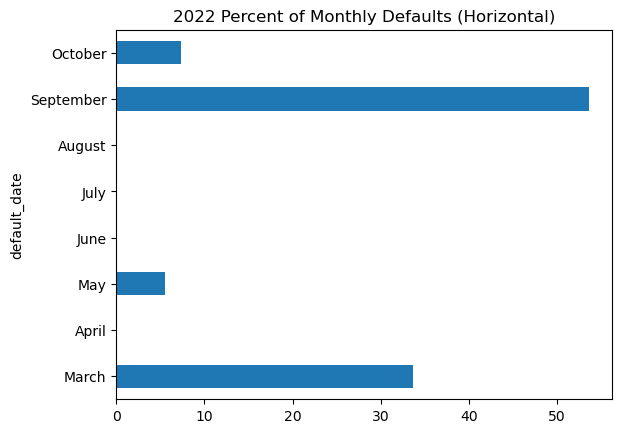

In [17]:
# Calculate the sum of 'total_gbv' per month for 2022
monthly_sum = loans_2022.resample('M', on='default_date')['total_gbv'].sum()

# Calculate total sum for 2022
total_sum_2022 = monthly_sum.sum()

# Calculate monthly percentage of defaults
monthly_percent = monthly_sum.div(total_sum_2022).mul(100)
monthly_percent.rename(lambda idx: idx.month_name()).plot.barh(title='2022 Percent of Monthly Defaults (Horizontal)')
plt.show()

<Axes: title={'center': 'Top 10 NDGs'}>

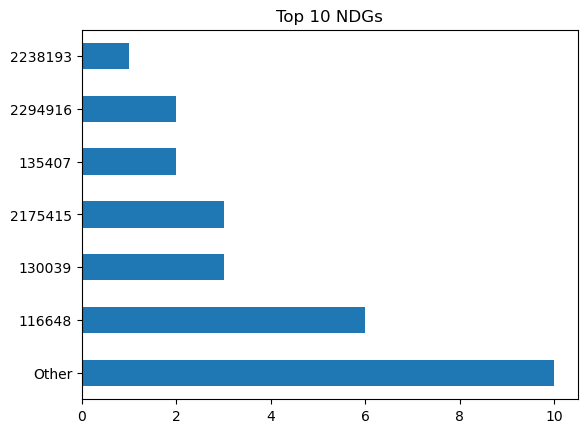

In [19]:
top10_indexes = loans.total_gbv.sort_values(ascending=False).index[:10]
top10 = loans.loc[top10_indexes, 'ndg']

(loans.ndg
.where(loans.ndg.isin(top10), 'Other')
.value_counts()
.plot.barh(title="Top 10 NDGs")
)

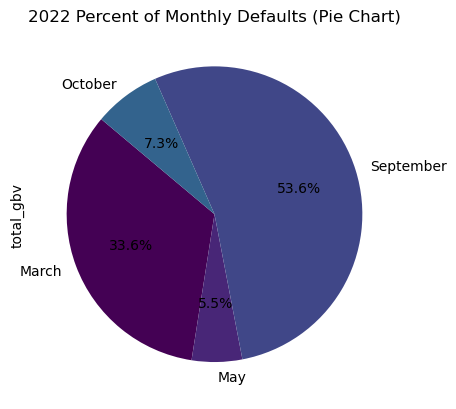

In [20]:
# Define a custom color palette
custom_colors = ["#440154", "#482677", "#404788", "#33638d", "#287d8e",
                 "#1f968b", '#29af7f', '#55c667', '#73d055', '#b8de29', '#fde725']

# Calculate the sum of 'total_gbv' per month for 2022
monthly_sum = loans_2022.resample('M', on='default_date')['total_gbv'].sum()

# Calculate total sum for 2022
total_sum_2022 = monthly_sum.sum()

# Calculate monthly percentage of defaults
monthly_percent = monthly_sum.div(total_sum_2022).mul(100)
monthly_percent = monthly_percent[monthly_percent != 0.0] #there are months without data
monthly_percent.rename(lambda idx: idx.month_name()).plot.pie(
    title='2022 Percent of Monthly Defaults (Pie Chart)', colors=custom_colors, autopct='%1.1f%%', startangle=140)
plt.show()

<Axes: >

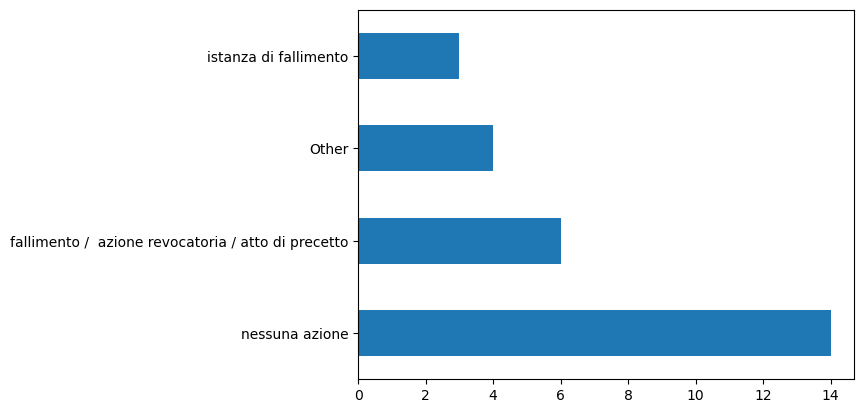

In [26]:
def topn(ser, n=3):
    vals = ser.value_counts().index[:n]
    return ser.where(ser.isin(vals), 'Other')

(loans['judicial_procedures']
 .pipe(topn)  
 .value_counts()
 .plot.barh()
)